# Group clients by RWA and LRD

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
%matplotlib inline

In [36]:
data = pd.read_csv('RWA_LRD_version15.txt',sep='\t')

In [24]:
data.head()

,Client_Name_Anon,Code_Category,Sector,Collateralised,SIMM,Credit_Rating,Sum_B3_RWA_CHF,Sum_B3_LRD_CHF
0,Client_Name_Anon_1,NoClient1,Journal,No_data,No,No_Data,2.147389e+09,2.748477e+08
1,Client_Name_Anon_2,NoClient2,Journal,No_data,No,No_Data,1.714459e+06,NaN
2,Client_Name_Anon_3,Internal1,Internal,No_data,No,No_Data,-1.659924e+05,2.030446e+10
3,Client_Name_Anon_4,Internal2,Internal,No_data,No,No_Data,3.009220e+03,5.511340e+05
4,Client_Name_Anon_5,No_Sector,No_Sector,No_data,Yes,No_Data,2.170612e+07,6.277612e+07


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 8 columns):
Client_Name_Anon    9322 non-null object
Code_Category       9322 non-null object
Sector              9322 non-null object
Collateralised      9322 non-null object
SIMM                9322 non-null object
Credit_Rating       9322 non-null object
Sum_B3_RWA_CHF      8611 non-null float64
Sum_B3_LRD_CHF      8585 non-null float64
dtypes: float64(2), object(6)
memory usage: 582.7+ KB


In [30]:
data.describe()
# some missing LRD data points

,RWA,LRD
count,8.611000e+03,8.585000e+03
mean,1.607223e+06,8.347716e+06
std,2.409040e+07,2.423817e+08
min,-6.029520e+06,-4.792914e+09
25%,4.330700e+02,1.619200e+04
50%,2.660294e+04,1.634440e+05
75%,3.262978e+05,1.275466e+06
max,2.147389e+09,2.030446e+10


In [37]:
data.columns = ['Client', 'Category', 'Sector', 'Collateralised', 'SIMM', 'CreditRating', 'RWA', 'LRD']
data.head()

,Client,Category,Sector,Collateralised,SIMM,CreditRating,RWA,LRD
0,Client_Name_Anon_1,NoClient1,Journal,No_data,No,No_Data,2.147389e+09,2.748477e+08
1,Client_Name_Anon_2,NoClient2,Journal,No_data,No,No_Data,1.714459e+06,NaN
2,Client_Name_Anon_3,Internal1,Internal,No_data,No,No_Data,-1.659924e+05,2.030446e+10
3,Client_Name_Anon_4,Internal2,Internal,No_data,No,No_Data,3.009220e+03,5.511340e+05
4,Client_Name_Anon_5,No_Sector,No_Sector,No_data,Yes,No_Data,2.170612e+07,6.277612e+07


In [38]:
data=data.dropna(axis='index')
data.describe()

,RWA,LRD
count,7.874000e+03,7.874000e+03
mean,1.754102e+06,8.597346e+06
std,2.518746e+07,2.527078e+08
min,-1.524498e+06,-4.792914e+09
25%,1.859945e+03,1.617800e+04
50%,3.940793e+04,1.430920e+05
75%,4.010957e+05,1.075752e+06
max,2.147389e+09,2.030446e+10


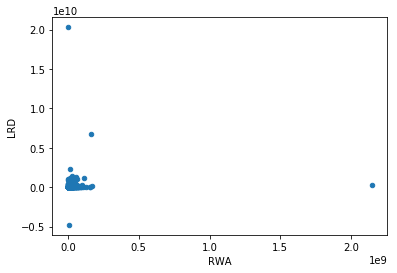

In [39]:
data.plot.scatter(x='RWA', y='LRD')

# Clustering

In [40]:
data = data.drop(['Client', 'Category', 'Sector', 'Collateralised', 'SIMM', 'CreditRating'], axis=1)

In [41]:
model = KMeans(n_clusters=5)
model.fit(scale(data))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
data['cluster'] = model.labels_

In [44]:
data.head()

,RWA,LRD,cluster
0,2.147389e+09,2.748477e+08,1
2,-1.659924e+05,2.030446e+10,2
3,3.009220e+03,5.511340e+05,0
4,2.170612e+07,6.277612e+07,0
5,3.075121e+07,1.376945e+07,0


# Visualization

In [45]:
groups = data.groupby('cluster')

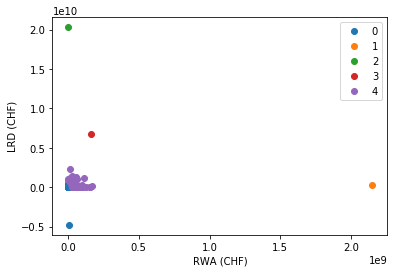

In [46]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.RWA, group.LRD, marker='o', linestyle='', label=name)

# Add axis labels appropriately
plt.xlabel('RWA (CHF)')
plt.ylabel('LRD (CHF)')
ax.legend()
plt.show()

# Finetuning

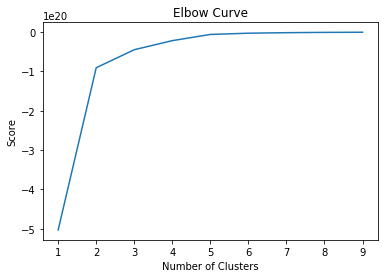

In [49]:
#WSS elbow test to determine optimal number of clusters
X = data[['RWA']]
Y = data[['LRD']] 
numClusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in numClusters]
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
plt.plot(numClusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()